# Modello di Kuramoto:
# $\frac{d \theta _{i} }{dt} = \omega _i + \sum_{j=1}^N K_{ij} \sin (\theta _j - \theta _i ), \ \ i = 1, ..., N$ 

In [1]:
import igraph as ig
import matplotlib.pyplot as plt
import random
import numpy as np
import copy
%matplotlib widget

In [2]:
def motion(_q_0, _omegas, _t_max, _dt, network):
    debug = False
    K = 1
    # how many vertices (oscillators)?
    _N = len(network.vs.indices)
    q = _q_0
    t = 0
    q_plot = np.zeros((int(_t_max/_dt), _N))
    dq_plot = np.zeros((int(_t_max/_dt), _N))
    dq0 = _omegas
    for t_count in range(int(_t_max/dt)):
        if debug:   print("\n", t)
#        for i in range(_N):
#            if debug: print("inizio", dq[i])
#            for j in range(_N):
#                dq[i] -= g.get_adjacency()[i][j] * K*np.sin(q[j] - q[i])
#            if debug: print("fine", dq[i])
        
        dq = kuramoto(q, _omegas, K, network, t)
        q_plot[t_count] = q
        dq_plot[t_count] = dq
        if debug: print(dq)
        q = eulero_esplicito(q, dq, dt)
#        q = runge_kutta4(q, dq, dt, t, omegas, K, network )
        q = q  % (2*np.pi)
        t += _dt
    return q_plot, dq_plot

def eulero_esplicito(q, dq, dt):
    return q + dq*dt

def runge_kutta4(q, dq, h, t, omegas, K, network):
    f = kuramoto
    k1_dot_q = f(q, omegas, K, network, t )
    k2_dot_q = f(q + k1_dot_q*h/2, omegas,  K, network, t + h/2)
    k3_dot_q = f(q + k2_dot_q*h/2, omegas, K, network, t + h/2)
    k4_dot_q = f(q + k3_dot_q*h, omegas,  K, network, t + h)
    q = (q + (k1_dot_q + 2*k2_dot_q + 2*k3_dot_q + k4_dot_q)*h/6.0)
    return q

def kuramoto(_q, _omegas, K, network, t):
    _N = len(network.vs.indices)
    _dq = copy.deepcopy(_omegas)
#    print("prima", _dq)
    for i in range(_N):
        for j in range(_N):
            _dq[i] -= network.get_adjacency()[i][j] * K * np.sin(_q[j] - _q[i])
#    print("dopo:",_dq)
    return _dq

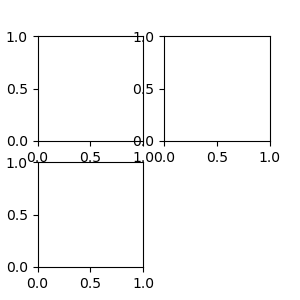

In [3]:
# setting graph
plt.close
fig = plt.figure(figsize = (3, 3) )
axs = [fig.add_subplot(2,2,1), fig.add_subplot(2,2,2), fig.add_subplot(2,2,3)]
#axs =[            fig.add_subplot(2, 2, 1), fig.add_subplot(2,2,2), fig.add_subplot(2,2,3, projection = 'polar') ]
# Set a random seed for reproducibility
random.seed(0)
N = 20

# inidial condition

dt = 0.1
t_max = 100
q_0 = np.random.rand(N)*2*np.pi
omegas = np.random.rand(N)
t_span = np.linspace(0, t_max, int(t_max/dt))

In [12]:
# Generate Erdos Renyi graphs based on probability
g_erdos_renyi = ig.Graph.Erdos_Renyi(n=N, p=0.2, directed=False, loops=False)

# Print out summaries of each graph
ig.summary(g_erdos_renyi)
ig.plot(g_erdos_renyi,     layout="circle")

q_plot_erd_ren, dq_plot_erd_ren = motion(q_0, omegas, t_max, dt, g_erdos_renyi)
axs[0].clear()
axs[0].plot(t_span[::10], dq_plot_erd_ren[::10, 0:20])


IGRAPH U--- 20 32 -- 


In [13]:
g_watts_strogatz = ig.Graph.Watts_Strogatz(dim = 1, size = 20, nei = 1, p = 0.2)
ig.plot(g_watts_strogatz)
ig.summary(g_watts_strogatz)

q_plot_watt_strog, dq_plot_watt_strog = motion(q_0, omegas, t_max, dt, g_watts_strogatz)
axs[1].clear()
axs[1].plot(t_span[::10], dq_plot_watt_strog[::10, 0:20])

IGRAPH U--- 20 20 -- 


IGRAPH U--- 20 37 -- 


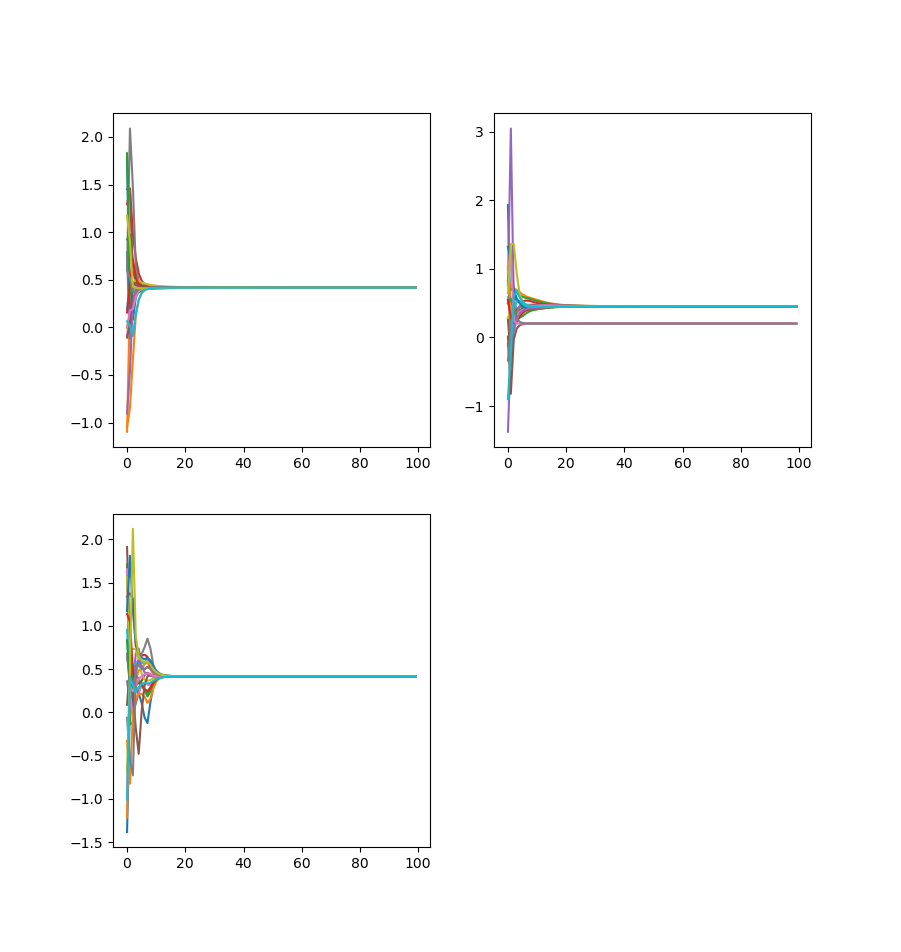

In [14]:
g_barabasi_albert = ig.Graph.Barabasi(n = N, m = 2 )
ig.plot(g_barabasi_albert, layout='circle')
ig.summary(g_barabasi_albert)
q_plot_barabasi_albert, dq_plot_barabasi_albert = motion(q_0, omegas, t_max, dt, g_barabasi_albert)
axs[2].clear()
axs[2].plot(t_span[::10], dq_plot_barabasi_albert[::10, 0:20])
plt.show()

In [11]:
#colors = plt.cm.rainbow(np.linspace(0, 1, N))
#axs[0].set_prop_cycle('color',[plt.cm.rainbow(i) for i in np.linspace(0, 1, N)])
axs[0].set_prop_cycle(color=[
    '#1f77b4', '#aec7e8', '#ffffff', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])
